# EXPLORATORY DATA ANALYSIS

Dataset: https://bit.ly/3i4rbWl

In [11]:
#Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Loading dataset into the created dataframe
df = pd.read_csv("C:\\Users\\acer\\Downloads\\SampleSuperstore.csv",encoding = 'latin1')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [26]:
#From the above observation we can see there is only one country i.e,United States so we can delete the country column.
#We can also delete the postal code column since there is no use of it in our analysis.
df.drop(columns=['Country','Postal Code'],inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
#Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
#Statistical Data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [21]:
#Finding unique values for each column
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Performing Data Visualization for more information

<AxesSubplot:>

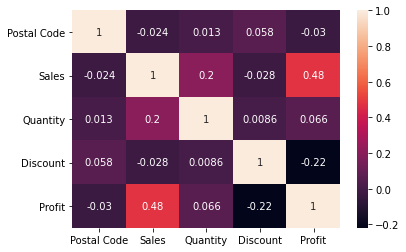

In [28]:
#Correlation Heatmap between attributes
sns.heatmap(df.corr(),annot=True)

## State Wise Analysis

In [30]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

<AxesSubplot:title={'center':'Transactions per State'}, xlabel='State', ylabel='Transactions'>

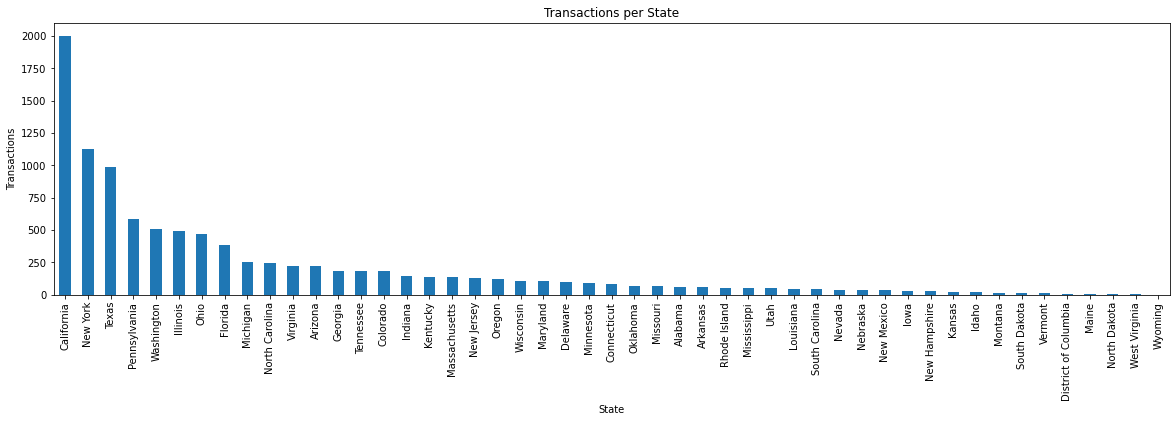

In [31]:
#Transactions per state
state_trans  = df['State'].value_counts()
state_trans.plot(kind = 'bar', figsize = (20,5), xlabel = 'State', ylabel = 'Transactions', title = 'Transactions per State')

State with most transactions are:
1. California
2. New York
3. Texas

<AxesSubplot:title={'center':'Avg. Sales per State'}, xlabel='Avg. Sales'>

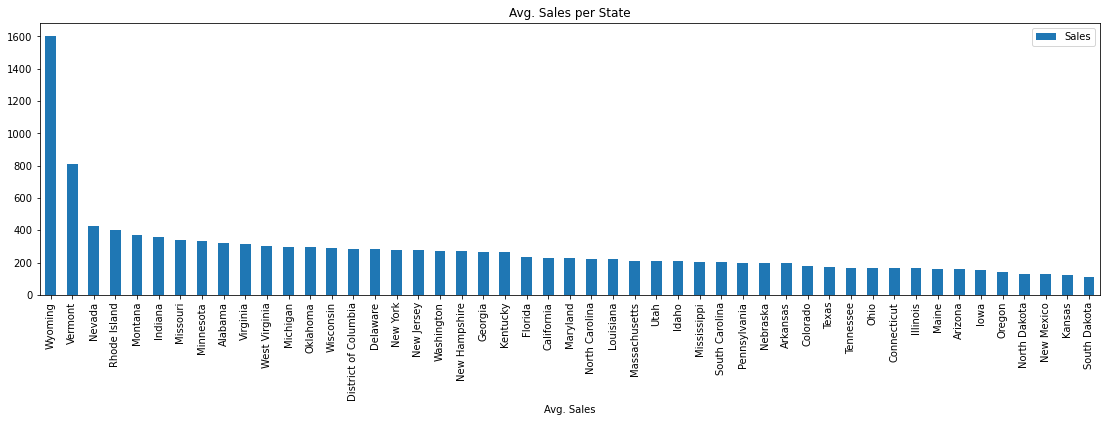

In [34]:
#Average Sales per State
state_sales = df.groupby(['State'])['State','Sales'].mean().sort_values('Sales',ascending = False)
state_sales.plot(kind = 'bar', figsize=(19,5),xlabel = 'Avg. Sales', title = 'Avg. Sales per State')

State with most sales are:
1. Wyoming
2. Vermont
3. Nevada

<AxesSubplot:title={'center':'Avg. Profits per State'}, xlabel='State', ylabel='Avg. Profits'>

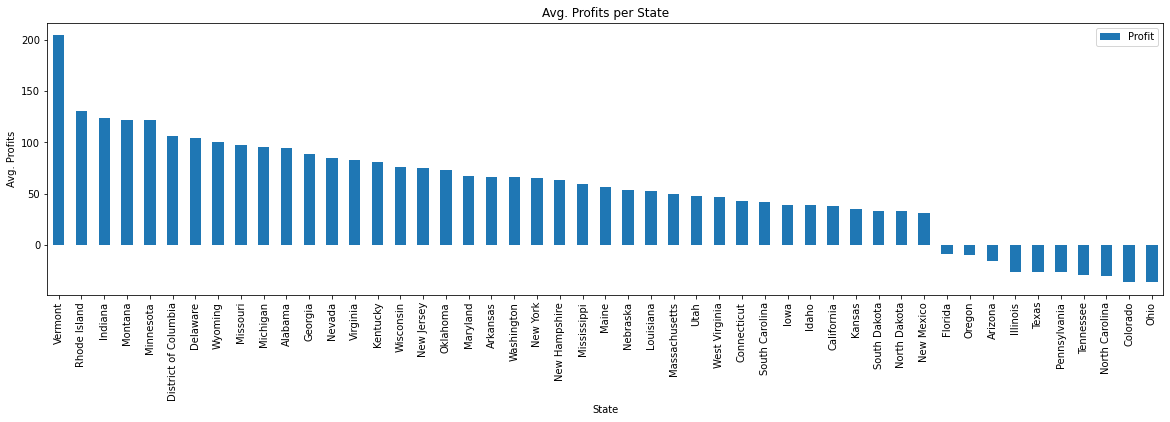

In [35]:
#Average profits per State
state_profits = df.groupby(['State'])['State','Profit'].mean().sort_values('Profit',ascending = False)
state_profits.plot(kind = 'bar', figsize=(20,5),xlabel = 'State', ylabel = 'Avg. Profits', title = 'Avg. Profits per State')

State with most profits are:
1. Vermont
2. Rhode island
3. Indiana

State with most losses are:
1. Ohio
2. Coloracio
3. North Carolina

## City Wise Analysis

In [37]:
#Finding unique values in City column
len(df['City'].unique())

531

As there are total 531 cities, we will analyze the first 30 cities.

<AxesSubplot:title={'center':'Transactions per City'}, xlabel='City', ylabel='Transactions'>

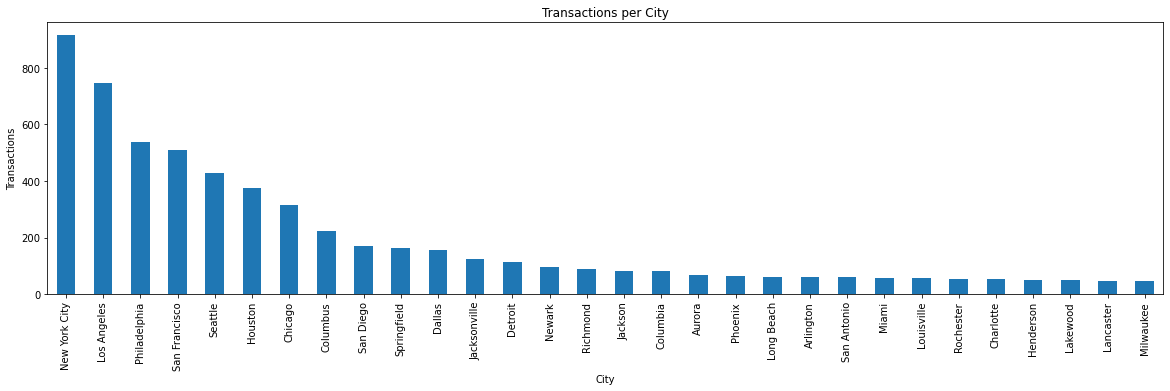

In [38]:
city_df = df['City'].value_counts()[:30]
city_df.plot(kind = 'bar', figsize=(20,5), xlabel = 'City', ylabel = 'Transactions', title='Transactions per City')

City with most Transactions are:
1. New York City
2. Los Angeles
3. Philadelphia

<AxesSubplot:title={'center':'Avg. Sales per City'}, xlabel='City', ylabel='Avg. Sales'>

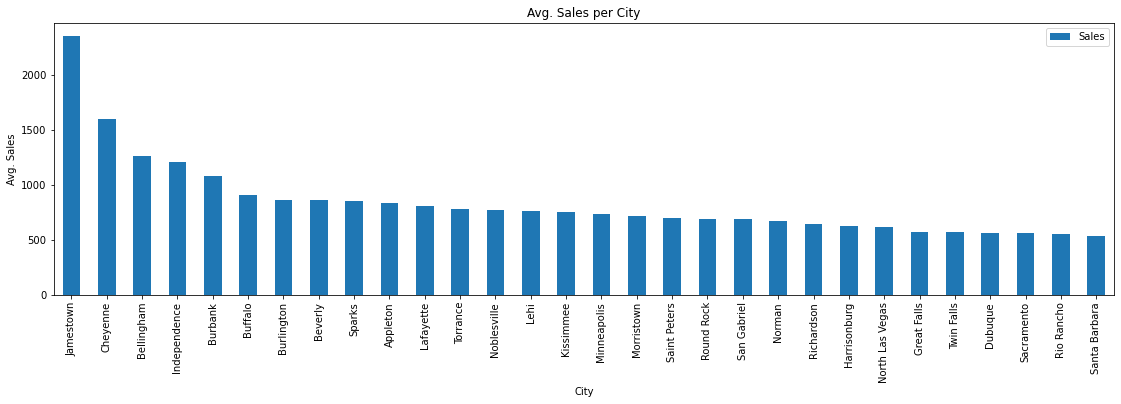

In [42]:
#Average Sales per City 
city_sales = df.groupby(['City'])['City','Sales'].mean().sort_values('Sales',ascending = False)[:30]
city_sales.plot(kind = 'bar', figsize=(19,5), xlabel = 'City', ylabel = 'Avg. Sales', title='Avg. Sales per City')

City with most sales are:
1. Jamestown
2. Cheyyene
3. Bellingham

<AxesSubplot:title={'center':'Avg. loss per City'}, xlabel='City', ylabel='Avg. loss'>

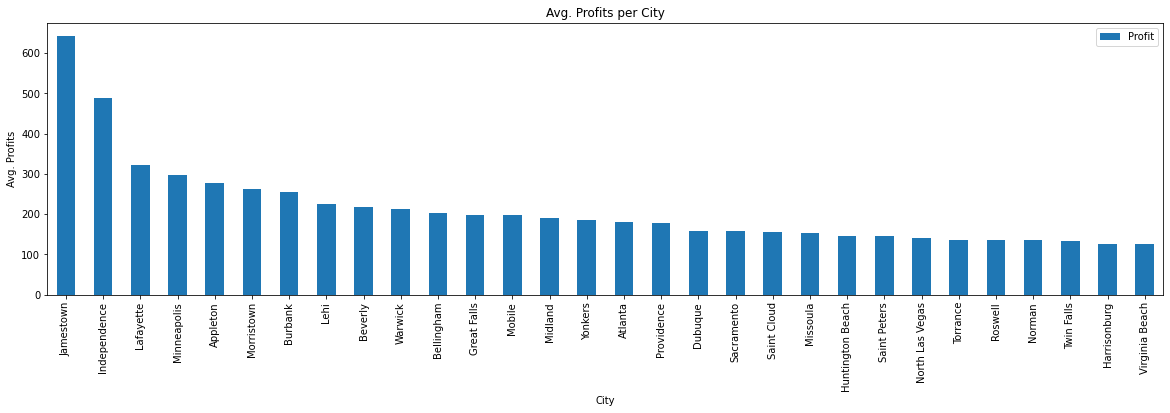

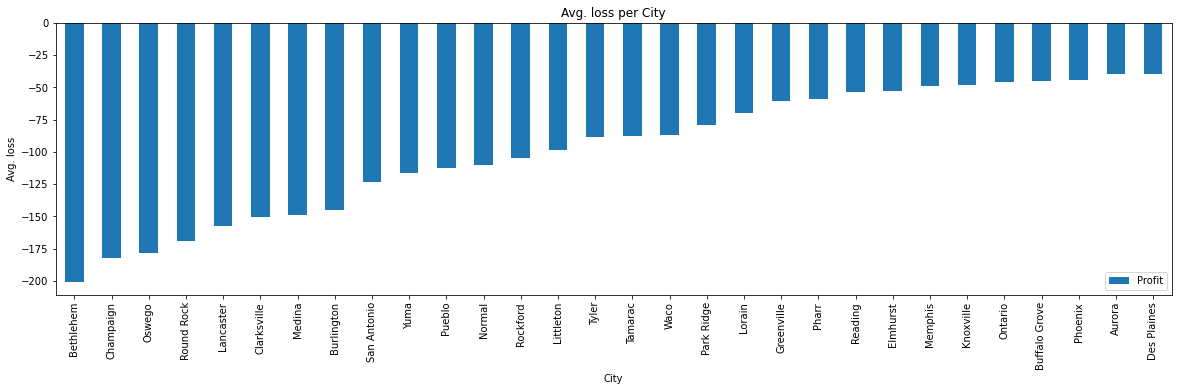

In [43]:
#Average profits per City
city_profits = df.groupby(['City'])['City','Profit'].mean().sort_values('Profit',ascending = False)[:30]
city_profits.plot(kind = 'bar', figsize=(20,5), xlabel = 'City', ylabel = 'Avg. Profits', title = 'Avg. Profits per City')

#Average Losses per City
city_loss = df.groupby(['City'])['City','Profit'].mean().sort_values('Profit',ascending = True)[:30]
city_loss.plot(kind = 'bar', figsize=(20,5), xlabel = 'City', ylabel = 'Avg. loss', title = 'Avg. loss per City')

City with most profits are:
1. Jamestown
2. Independence
3. Lafayette

City with most losses are:
1. Bethlehem
2. Champaign
3. Oswego

## Categry Wise Analysis

<AxesSubplot:xlabel='Category', ylabel='count'>

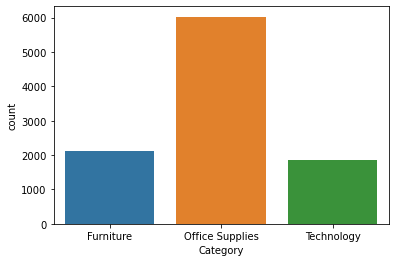

In [45]:
sns.countplot(df['Category'])

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

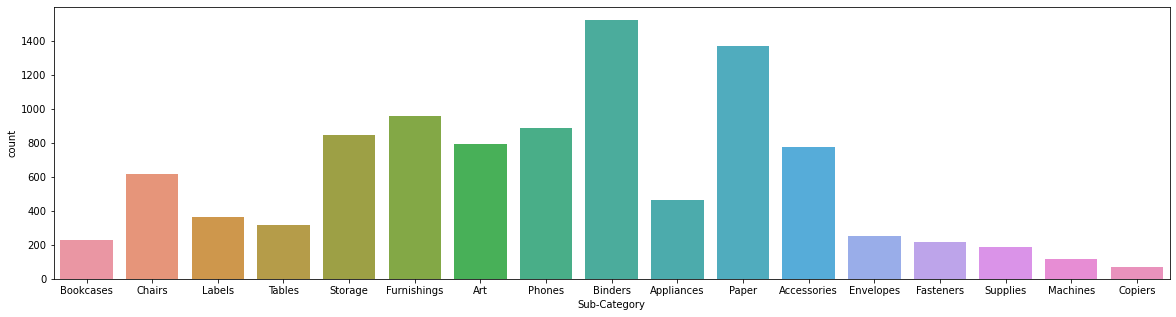

In [49]:
plt.figure(figsize = (20,5))
sns.countplot(df['Sub-Category'])

In [50]:
cat_df = df.groupby(['Category'])[['Category','Sales','Profit']].mean()
cat_df.head()

,Sales,Profit
Category,,
Furniture,349.834887,8.699327
Office Supplies,119.324101,20.327050
Technology,452.709276,78.752002


Maximum sales and profits is in technology

## INSIGHTS

Hence, the observations and solutions are:
1. Moderate corelation between profit and sales. Almost no correlation between Discount and Quantity or Discount and Sales and also Negative Correlation between Discount and Profit is low. Hence, Discount given by the store is not useful as it is not able to increase the production of store and its profit.
2. Copiers have highest Sales as well as Profits and the highest sales with 30.16%. The sales is highest in case of phones and lowest in case of Fasteners.
3. The Central region has the lowest profit whereas the West has the highest profit. So in order to increase profit we must focus on Central and South region.
4. Consumer has the highest profit where as Home Office has the lowest profit. So to increase profit we must focus on Home Office and Segment.